<a href="https://colab.research.google.com/github/1994shuklaanand/covid19-data-analysis/blob/main/covid19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# importing libray in web scrapping

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# data collected from PSR INDIA ORGANIZATION

In [3]:
url='https://prsindia.org/covid-19/cases'

In [4]:
r =requests.get(url)

In [5]:
print(r)

<Response [200]>


In [6]:
soup=BeautifulSoup(r.text,'lxml')

In [7]:
table= soup.find('table', class_='table table-striped table-bordered')

In [8]:
headers = table.find_all('th')

In [9]:
titles=[]
for i in headers:
  title= i.text
  titles.append(title)
print(titles)

['#', 'State/UT', 'Confirmed Cases', 'Active Cases', 'Cured/Discharged', 'Death']


In [10]:
print(headers)

[<th>#</th>, <th>State/UT</th>, <th style="width: 11%; text-align:right">Confirmed Cases</th>, <th style="width: 9%; text-align:right">Active Cases</th>, <th style="width: 2%; text-align:right">Cured/Discharged</th>, <th style="width: 5%; text-align:right">Death</th>]


In [11]:
df=pd.DataFrame(columns=titles)

In [12]:
print(df)

Empty DataFrame
Columns: [#, State/UT, Confirmed Cases, Active Cases, Cured/Discharged, Death]
Index: []


In [13]:
rows = table.find_all('tr')

In [14]:
for i in rows[1:]:
  data=i.find_all('td')
  #print(data)
  row=[tr.text for tr in data]
  l= len(df)
  df.loc[l]= row
print(df)

     #                                  State/UT Confirmed Cases Active Cases  \
0                                          India        43452164       104555   
1    1               Andaman and Nicobar Islands           10157           42   
2    2                            Andhra Pradesh         2321379          755   
3    3                         Arunachal Pradesh           64518            4   
4    4                                     Assam          724788          395   
5    5                                     Bihar          832581          934   
6    6                                Chandigarh           93785          568   
7    7                              Chhattisgarh         1154179          861   
8    8  Dadra and Nagar Haveli and Daman and Diu           11474           14   
9    9                                     Delhi         1934009         4325   
10  10                                       Goa          248540          982   
11  11                      

In [15]:
print(df)

     #                                  State/UT Confirmed Cases Active Cases  \
0                                          India        43452164       104555   
1    1               Andaman and Nicobar Islands           10157           42   
2    2                            Andhra Pradesh         2321379          755   
3    3                         Arunachal Pradesh           64518            4   
4    4                                     Assam          724788          395   
5    5                                     Bihar          832581          934   
6    6                                Chandigarh           93785          568   
7    7                              Chhattisgarh         1154179          861   
8    8  Dadra and Nagar Haveli and Daman and Diu           11474           14   
9    9                                     Delhi         1934009         4325   
10  10                                       Goa          248540          982   
11  11                      

In [16]:
df.to_csv('covid cases.csv')

In [17]:
# column '#' from data set was removed using excel and data again data has been uploaded.

In [18]:
data=pd.read_csv('/content/covid cases.csv')

In [19]:
data.head(10)

,Unnamed: 0,#,State/UT,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,0,,India,43452164,104555,42822493,525116
1,1,1,Andaman and Nicobar Islands,10157,42,9986,129
2,2,2,Andhra Pradesh,2321379,755,2305893,14731
3,3,3,Arunachal Pradesh,64518,4,64218,296
4,4,4,Assam,724788,395,716405,7988
5,5,5,Bihar,832581,934,819388,12259
6,6,6,Chandigarh,93785,568,92052,1165
7,7,7,Chhattisgarh,1154179,861,1139282,14036
8,8,8,Dadra and Nagar Haveli and Daman and Diu,11474,14,11456,4
9,9,9,Delhi,1934009,4325,1903423,26261


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        37 non-null     int64 
 1   #                 37 non-null     object
 2   State/UT          37 non-null     object
 3   Confirmed Cases   37 non-null     int64 
 4   Active Cases      37 non-null     int64 
 5   Cured/Discharged  37 non-null     int64 
 6   Death             37 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ KB


In [21]:
#importing libraries for visualisation

In [22]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

In [24]:
# box plot to show statewise death due to COVID 19

<Axes: xlabel='State/UT', ylabel='Death'>

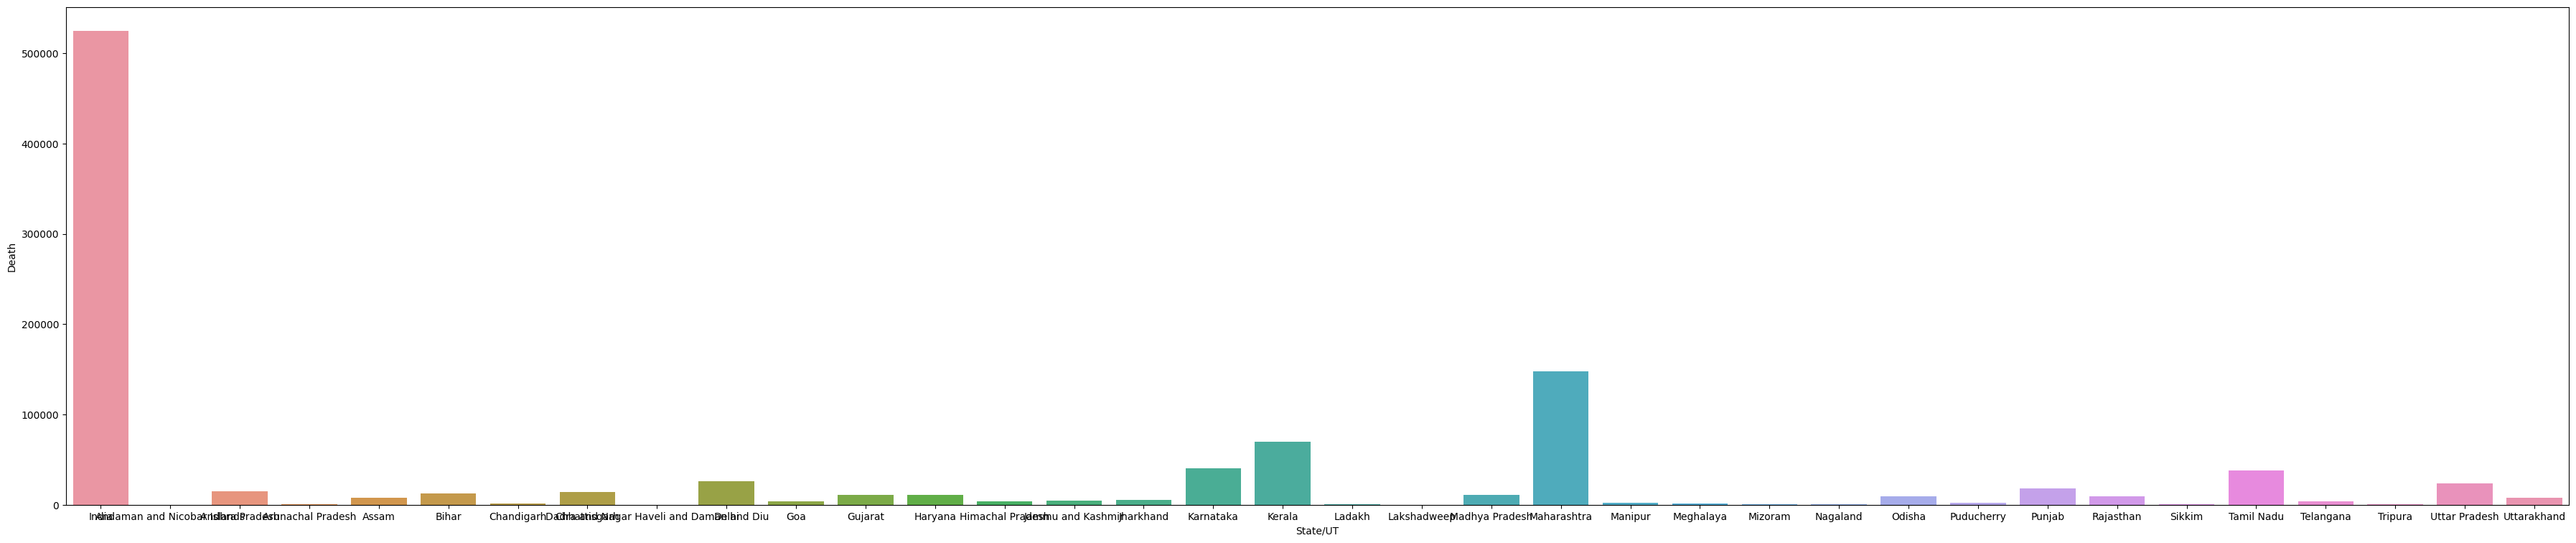

In [42]:
fig=plt.figure(figsize=(45,9))
sns.barplot(data=data.iloc[:36],x='State/UT',y='Death')

In [26]:
# box plot to show statewise  confirmed COVID 19 cases


<Axes: xlabel='State/UT', ylabel='Confirmed Cases'>

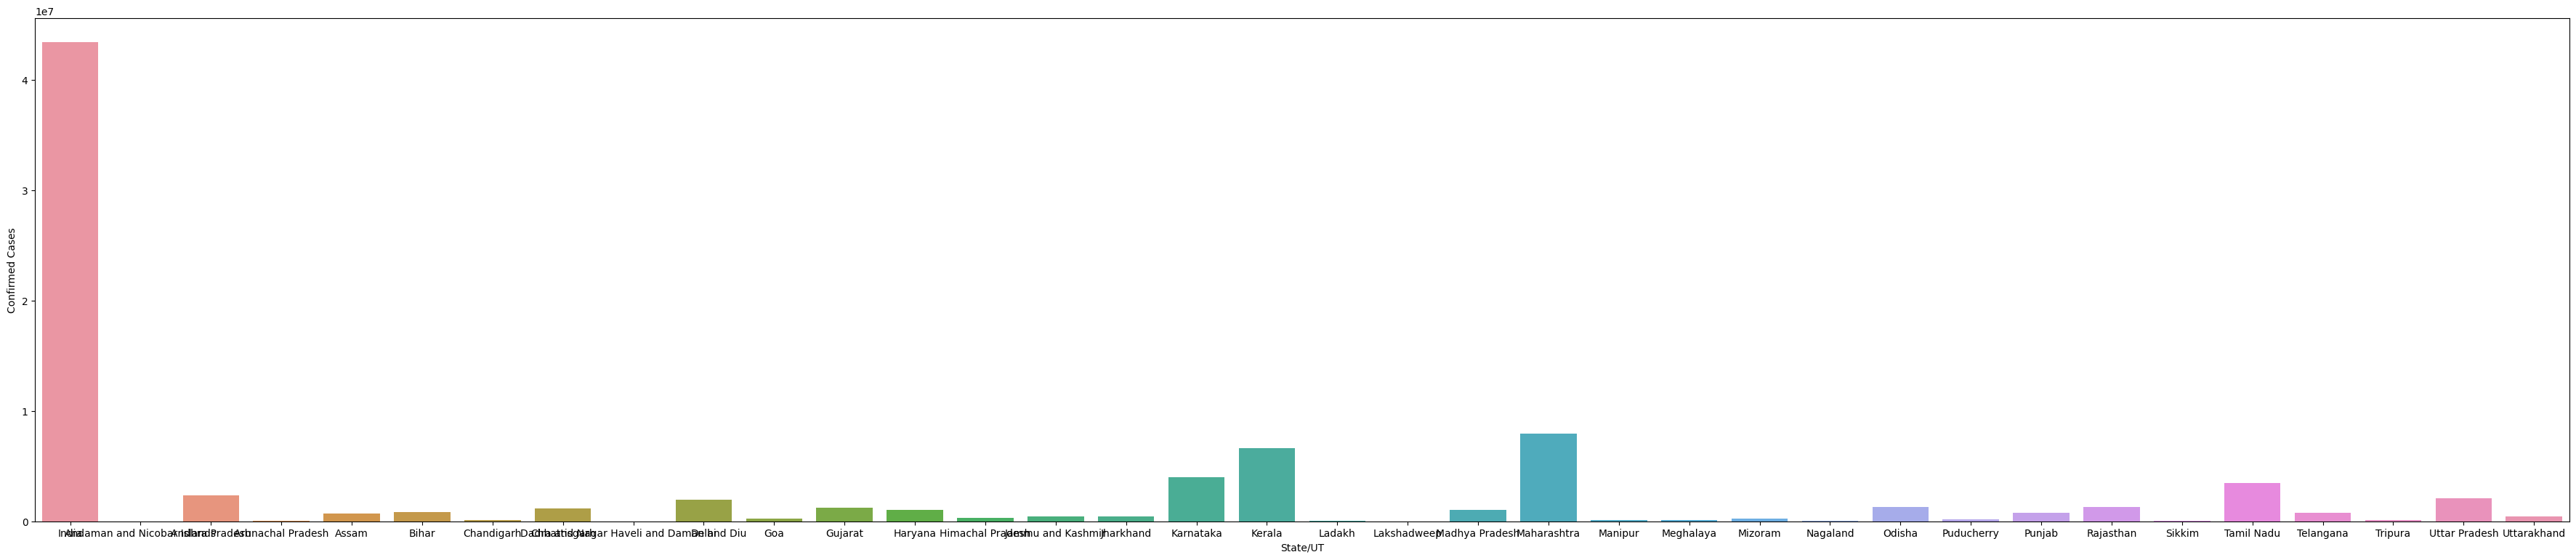

In [43]:
fig=plt.figure(figsize=(45,9))
sns.barplot(data=data.iloc[:36],x='State/UT',y='Confirmed Cases')

In [28]:
# box plot to show statewise count of people cured from covid

<Axes: xlabel='State/UT', ylabel='Cured/Discharged'>

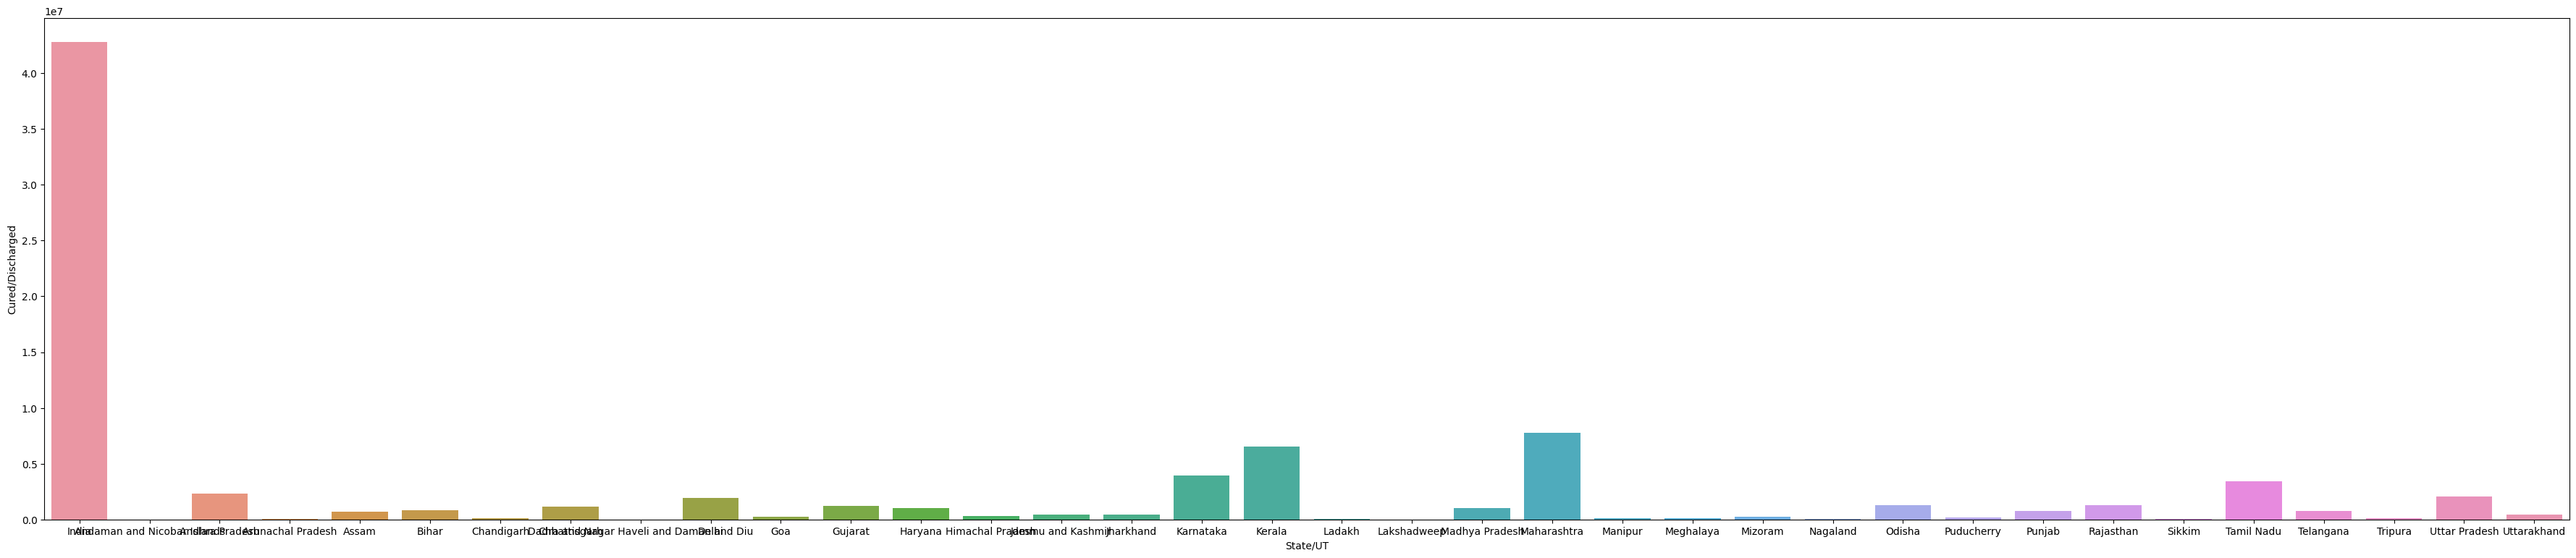

In [29]:
fig=plt.figure(figsize=(45,9))
sns.barplot(data=data.iloc[:36],x='State/UT',y='Cured/Discharged')

In [30]:
# box plot to show statewise active cases

In [31]:
statewise=pd.pivot_table(data,values=['Confirmed Cases','Cured/Discharged','Death'],index='State/UT',aggfunc=max)

In [32]:
statewise= statewise.sort_values(by='Confirmed Cases', ascending=False)

In [33]:
#graph in decending order of confirmed cases statewise

In [34]:
statewise.style.background_gradient(cmap='cubehelix')

,Confirmed Cases,Cured/Discharged,Death
State/UT,,,
India,43452164,42822493,525116
Maharashtra,7972474,7798817,147922
Kerala,6634722,6535869,69993
Karnataka,3968365,3922541,40117
Tamil Nadu,3473116,3425057,38026
Andhra Pradesh,2321379,2305893,14731
Uttar Pradesh,2090050,2062971,23538
West Bengal,2027901,2000798,21218
Delhi,1934009,1903423,26261


In [35]:
#pie chart to show confirmed cases, discharged cases, death in top 10 states in corona outbreak(as per confirmed cases data)

array([<Axes: ylabel='Confirmed Cases'>,
       <Axes: ylabel='Cured/Discharged'>, <Axes: ylabel='Death'>],
      dtype=object)

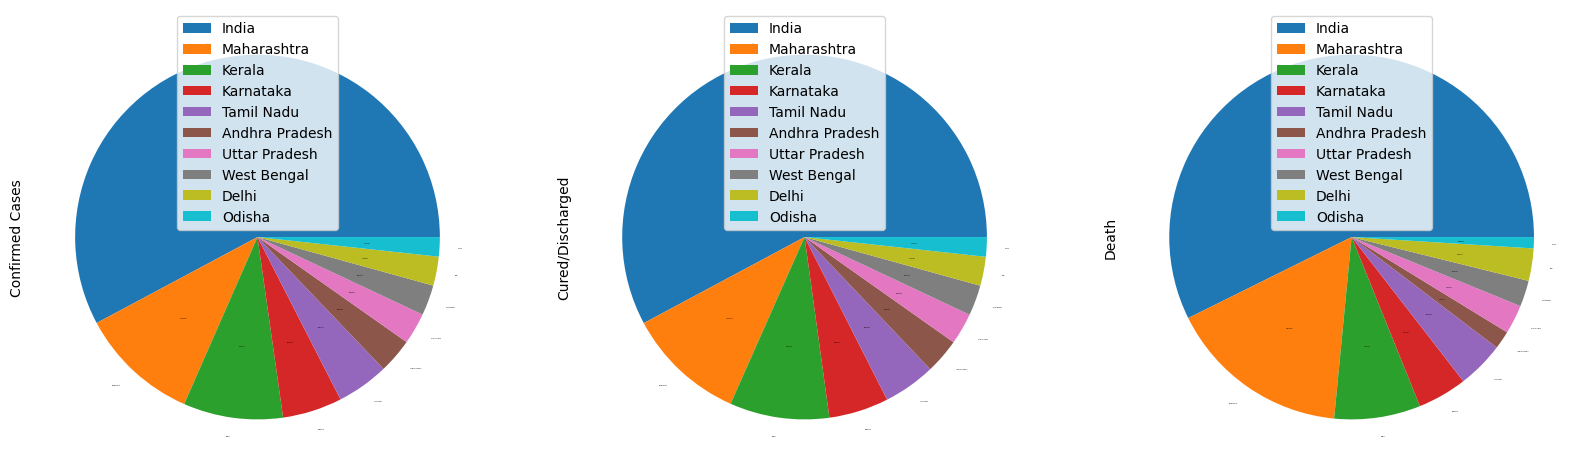

In [36]:
statewise.iloc[0:10].plot.pie(subplots=True,figsize=(20,20),fontsize=0.2,autopct='%1f')

In [40]:
confirmed=data['Confirmed Cases']

In [44]:
Active=data['Active Cases']

In [45]:
state=data['State/UT']

In [46]:
 #pie chart to compare the percentage of active cases of corona in differet state

([<matplotlib.patches.Wedge at 0x79f5b0ae1810>,
 [Text(-1.1, 1.3471114790620887e-16, 'India'),
  Text(0.0006940919559448759, -1.099999781016504, 'Andaman and Nicobar Islands'),
  Text(0.013864947205011864, -1.099912616183214, 'Andhra Pradesh'),
  Text(0.026406011929477998, -1.0996830100233341, 'Arunachal Pradesh'),
  Text(0.032997471820481766, -1.099504964451483, 'Assam'),
  Text(0.05494260573345388, -1.0986270113533612, 'Bihar'),
  Text(0.07971758387070617, -1.09710760949955, 'Chandigarh'),
  Text(0.10325096269512887, -1.0951434785919738, 'Chhattisgarh'),
  Text(0.1176380350252422, -1.093691589395932, 'Dadra and Nagar Haveli and Daman and Diu'),
  Text(0.18863277760251143, -1.083705529751492, 'Delhi'),
  Text(0.27434633263731156, -1.0652389824675297, 'Goa'),
  Text(0.3361915766827411, -1.0473658500101923, 'Gujarat'),
  Text(0.42254294705877854, -1.0156069406472576, 'Haryana'),
  Text(0.47029425810503495, -0.9943959527237805, 'Himachal Pradesh'),
  Text(0.4844976955959347, -0.987553534

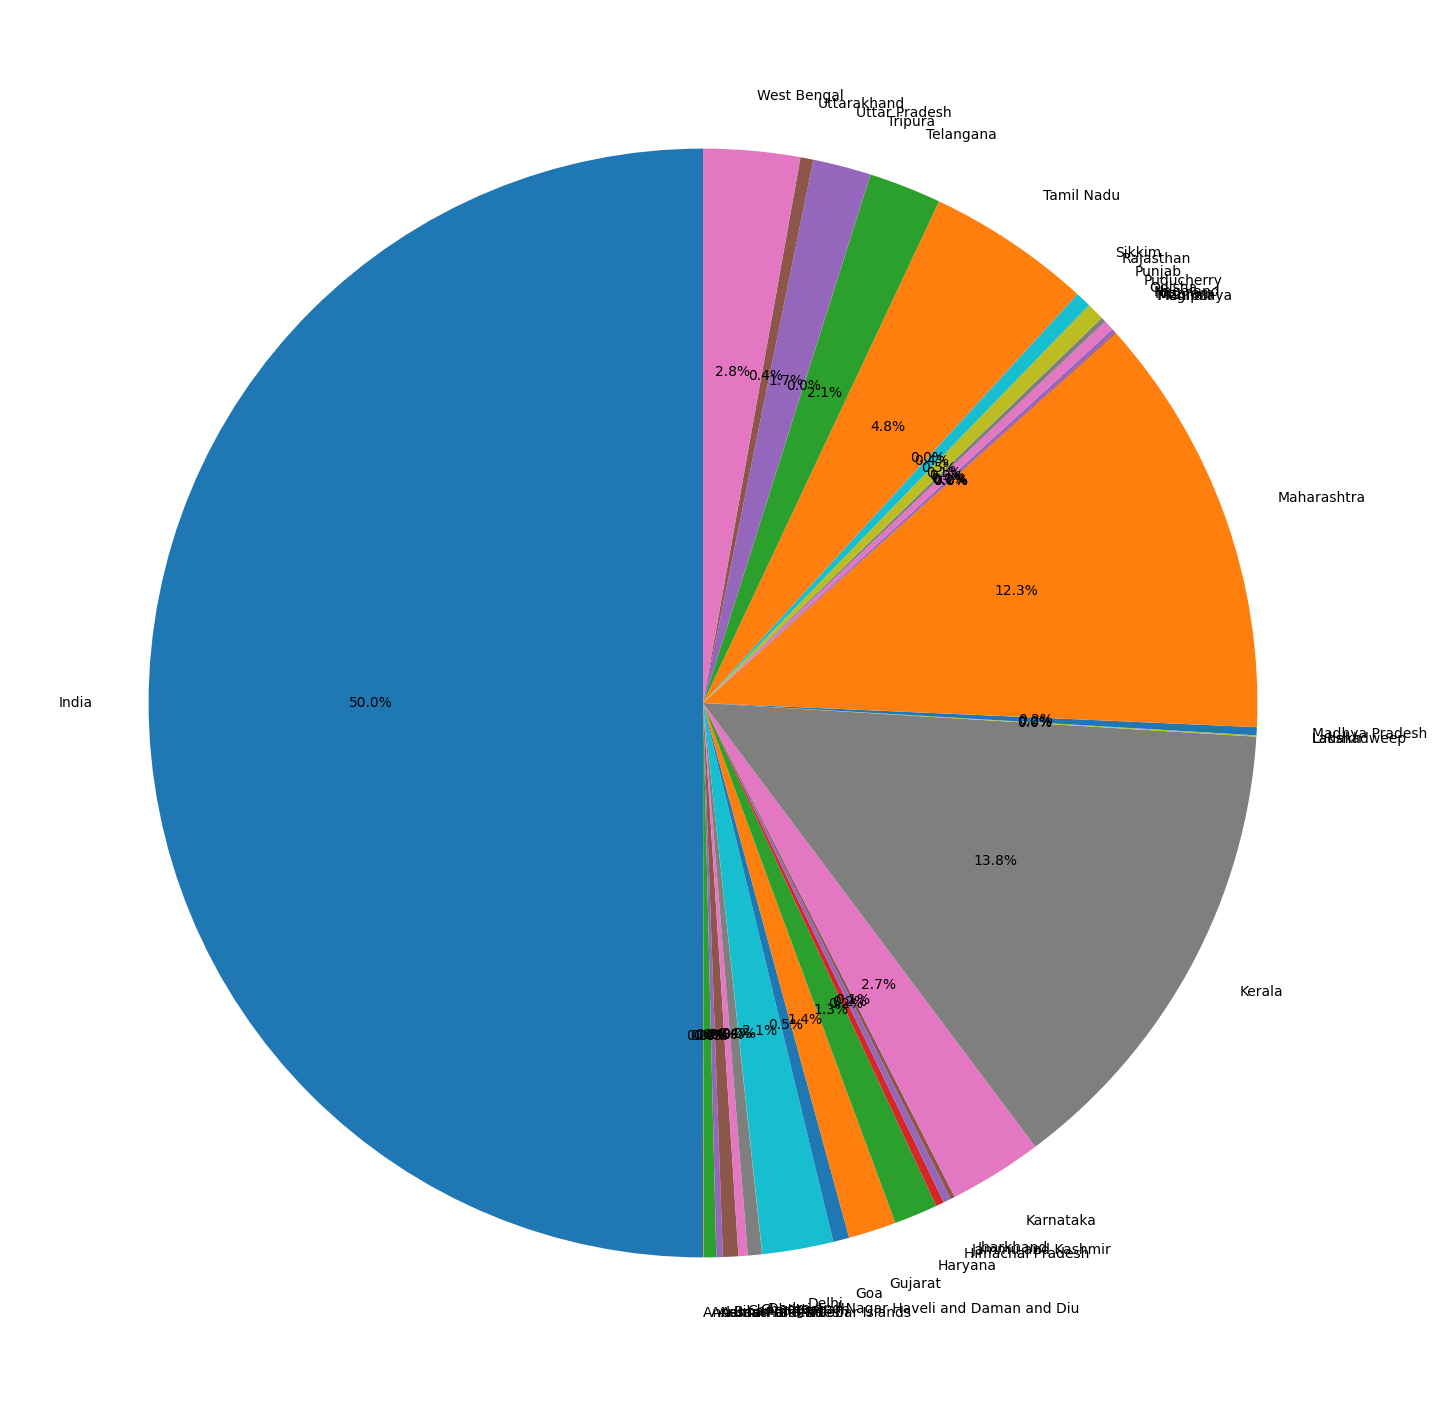

In [47]:
plt.figure(figsize=(20, 18))
plt.pie(Active, labels=state, autopct='%1.1f%%', startangle=90)

In [51]:
#scatter plot of confirmed cases v/s active cases

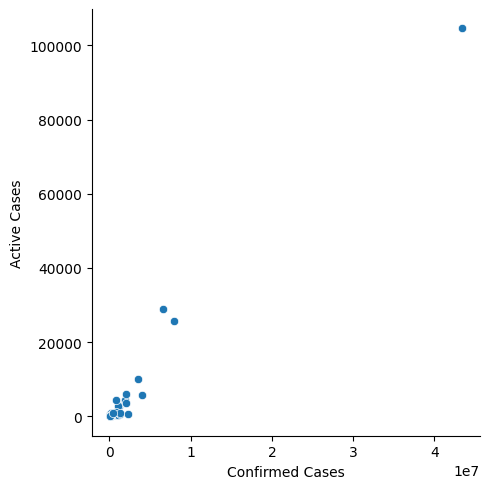

In [49]:
sns.relplot(x='Confirmed Cases',y='Active Cases',data=data)

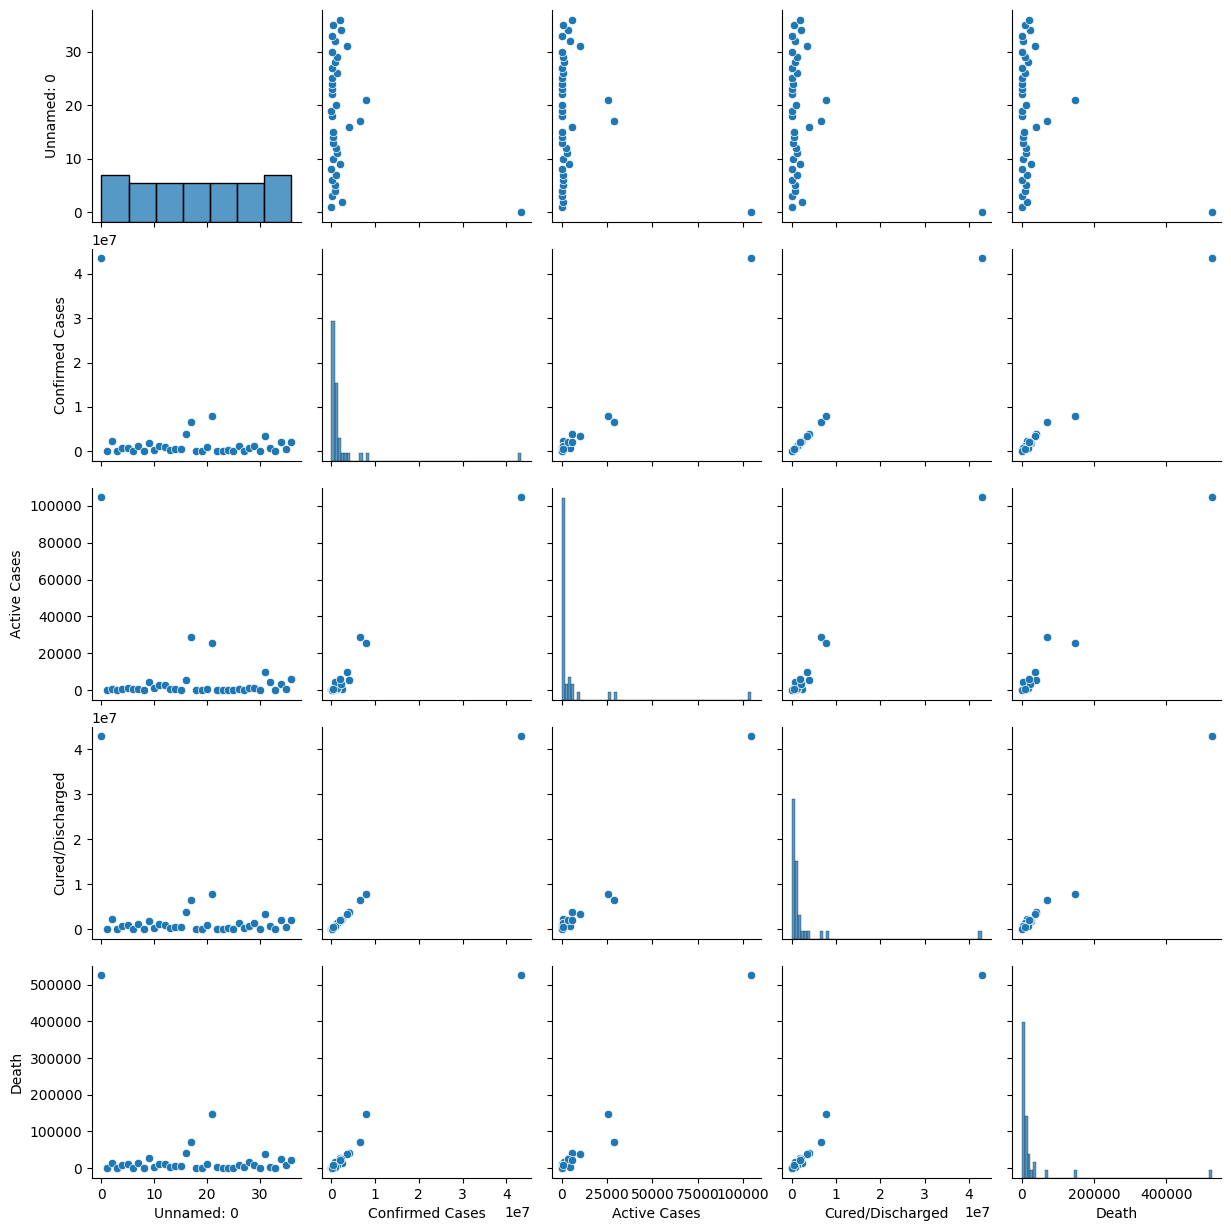

In [50]:
sns.pairplot(data)